## Homework 2 Part 2 Task 1: PCA
We will use the Fashion-MNIST dataset to build a PCA model. <br>
https://github.com/zalandoresearch/fashion-mnist <br>
Then, we will use the PCA model to <br>
(1) visualize the data in 2D <br>
(2) generate new images as a generative model <br>
This is a guided-task: <br>
You will see the output of a code cell and then figure out the code in that cell. <br>
In each code cell, there are instructions to help you. <br>
This is a very efficient and effective way to learn how to program with sk-learn

#### First, we load the dataset

In [2]:
# load the data, and it may take a while
from sklearn.datasets import fetch_openml
fasion_mnist=fetch_openml(name="Fashion-MNIST")

In [3]:
data=fasion_mnist.data.values
images=data.reshape(-1,28,28)
target=fasion_mnist.target.astype('int64')

In [4]:
#a row in data is an image (28x28 reshaped into a vector of 784 elements)
data.shape

(70000, 784)

In [5]:
# images[0] is the first image (28x28)
images.shape

(70000, 28, 28)

In [6]:
#an element in target is the class label of the corresponding image in data
target.shape

(70000,)

In [7]:
[target.min(), target.max()]

[0, 9]

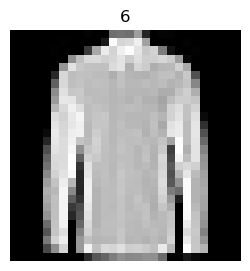

<Figure size 640x480 with 0 Axes>

In [8]:
# show some of the images
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, target.shape[0], 1000):
    x=data[n,:]
    x=x.reshape(28,28) # reshape a vector to an image
    ax.imshow(x, cmap='gray')    
    ax.axis('off')
    ax.set_title(target[n])
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1)  

#### we need the function plot_components for visualization

In [9]:
from matplotlib import offsetbox
import numpy as np
def plot_components(data, model, images, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

### Your work begins here

In [67]:
#use IncrementalPCA (instead of original PCA) in sk-learn
#it runs faster to get the eigenvectors and eigenvalues
#it is more memory efficient
#the function 'fit' computes eigenvectors and eigenvalues
#use 'fit_transform' to do fit and forward transform together

from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_new = scaler.fit_transform(data)

IPCA= IncrementalPCA()
IPCA.fit_transform(data_new)


array([[-4.96705018e-01,  6.40279401e+00, -4.74267873e+00, ...,
        -1.88109802e-04, -2.04545648e-04,  2.09728428e-05],
       [ 5.51993821e+00, -1.77111542e+00, -1.01902263e+00, ...,
        -3.22710847e-04,  2.54164295e-05,  2.46343707e-04],
       [-2.84454567e+00, -4.32811461e+00,  4.19287731e-01, ...,
        -4.63771627e-05, -4.07312332e-05, -3.16602437e-06],
       ...,
       [-2.00218127e+00, -2.85101612e+00, -8.14345879e-01, ...,
        -2.47763485e-04, -2.17925433e-05,  3.24162871e-05],
       [-8.66348345e-01, -5.53915586e+00, -1.73654014e+00, ...,
         1.40119265e-04,  1.63675591e-04, -5.55873345e-05],
       [-5.96524782e+00,  3.62511323e-01,  1.04209003e+00, ...,
        -3.04001589e-04,  7.68460008e-05,  1.86338432e-04]])

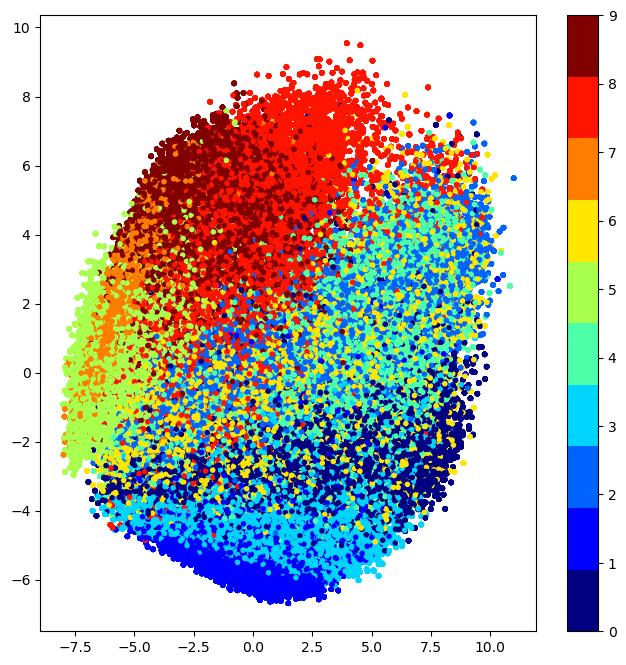

In [68]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Fit the data to the Incremental PCA model and transform it to 2D
proj = IPCA.fit_transform(data_new)

for i in range(10):
    plt.scatter(proj[:, 0], proj[:, 1], c=target, cmap=plt.cm.get_cmap('jet', 10), marker='.')

plt.colorbar(ticks=range(10))
plt.show()

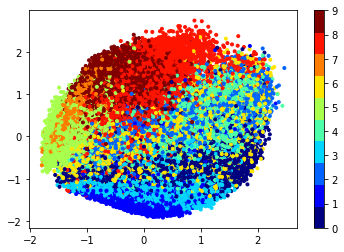

In [11]:
#show the data points in 2D
#you can find example code in my lecture notes (notebook files)
#you need to create a figure and axis:  fig, ax = plt.suplots()


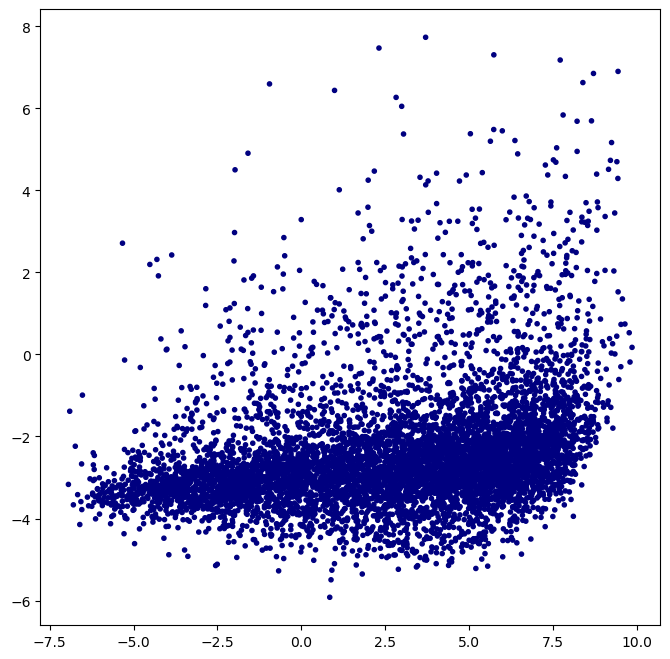

In [69]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

proj = IPCA.fit_transform(data_new)

# Plot the data points in 2D, colored by their target labels
for i in range(10):
    if i == 0:
        plt.scatter(proj[target == i, 0], proj[target == i, 1], c=target[target == i], cmap=plt.cm.get_cmap('jet', 10), marker='.')
plt.show()

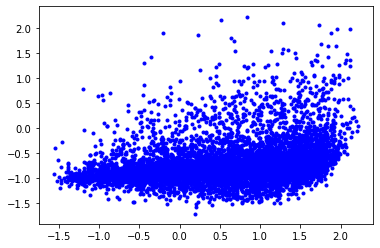

In [12]:
#show only the data points/images with class label=0 (i.e. target is 0) in 2D



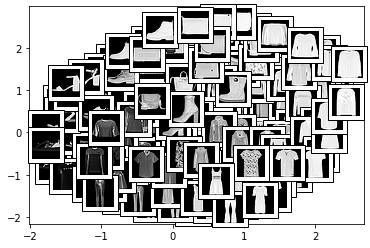

In [13]:
# use plot_components to show the data points
# the parameter 'model' of plot_components refers to the pca model


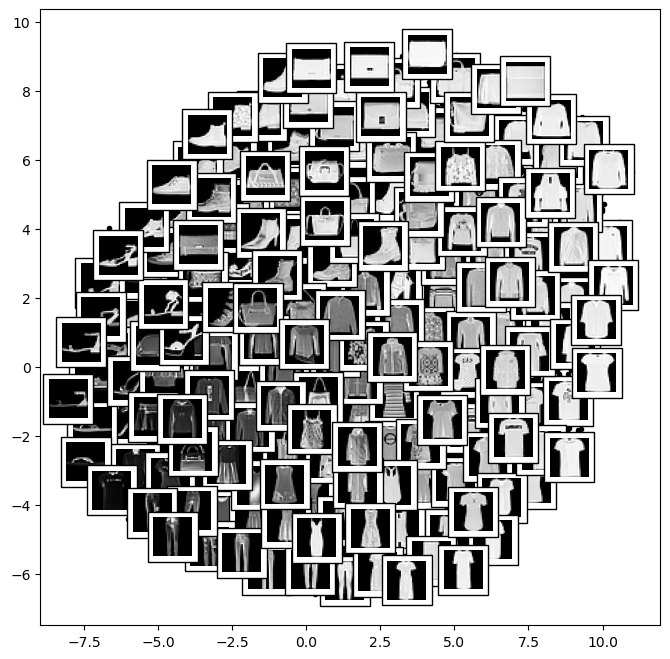

In [73]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_components(data_new, IncrementalPCA(n_components=2), images, ax=ax, cmap='gray')
plt.show()

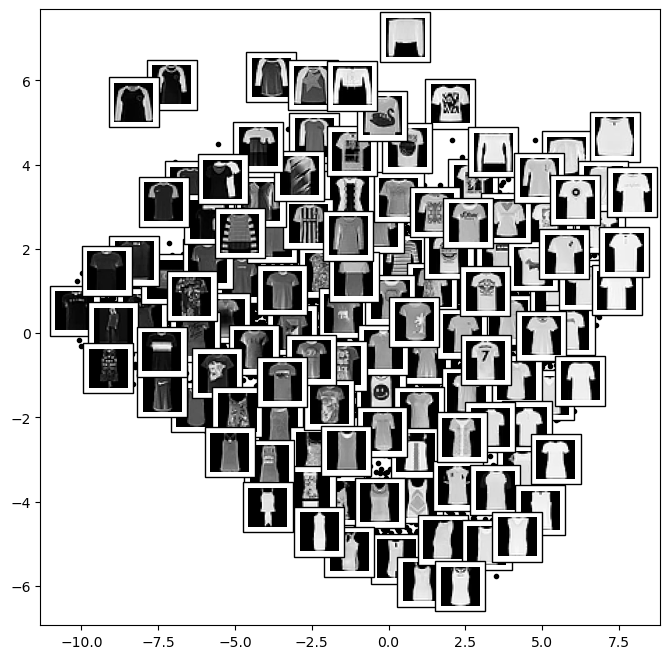

In [72]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_components(data_new[target==0], IncrementalPCA(n_components=2), images[target==0], ax=ax, cmap='gray')
plt.show()

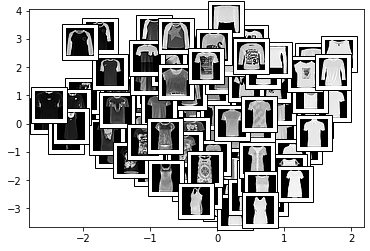

In [14]:
# use plot_components to show the data points with class label=0
# you may need something like this: data[target==0], images[target==0]


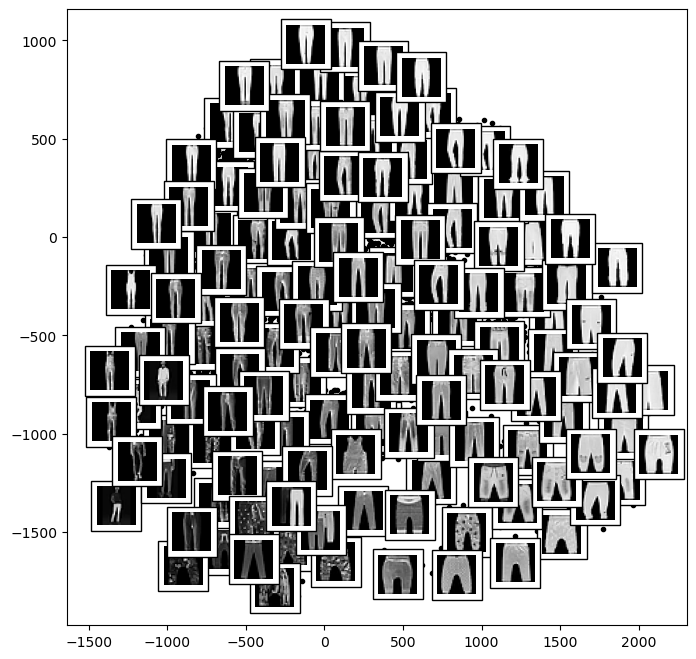

In [74]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_components(data[target==1], IncrementalPCA(n_components=2), images[target==1], ax=ax, cmap='gray')
plt.show()

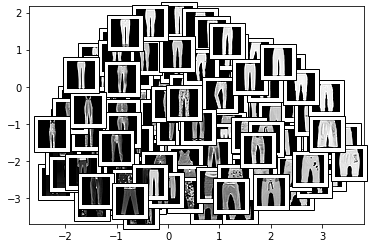

In [16]:
# use plot_components to show the data points with class label=1
# you may need something like this: data[target==1], images[target==1]


From the above examples, we can see that PCA can extract meaningful features from the images 

### 2. Use PCA to generate new images 

First, we need to figure out how many components we need

In [93]:
#use IncrementalPCA (instead of original PCA) in sk-learn
#set n_components to a large number, e.g, 100
IPCA_2= IncrementalPCA(n_components=100)
IPCA_2.fit_transform(data_new)

array([[-4.96704837e-01,  6.40279409e+00, -4.74267940e+00, ...,
         3.60671865e-02,  5.52342983e-02,  2.00019507e-01],
       [ 5.51993815e+00, -1.77111540e+00, -1.01901316e+00, ...,
         1.30253333e-02, -1.15977884e-01,  1.41254532e-01],
       [-2.84454584e+00, -4.32811483e+00,  4.19288815e-01, ...,
         7.24848958e-03,  1.24055846e-01, -9.60855331e-03],
       ...,
       [-2.00218161e+00, -2.85101551e+00, -8.14345894e-01, ...,
         3.94552301e-01, -2.17450456e-01,  1.91072403e-01],
       [-8.66347936e-01, -5.53915699e+00, -1.73653441e+00, ...,
         5.52220229e-01, -2.83463062e-01,  2.36805330e-03],
       [-5.96524794e+00,  3.62511719e-01,  1.04209319e+00, ...,
        -2.34371197e-01, -3.36108653e-02, -4.86000768e-02]])

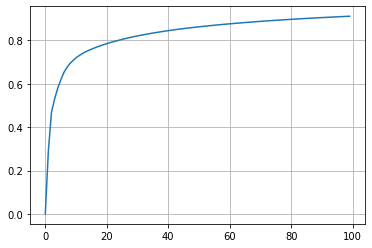

In [39]:
#plot the curve of 'percentage of variance explained' (0~1) vs n_components (0~100)
#apply np.cumsum on explained_variance_ratio_
# use plt.grid() to show grid

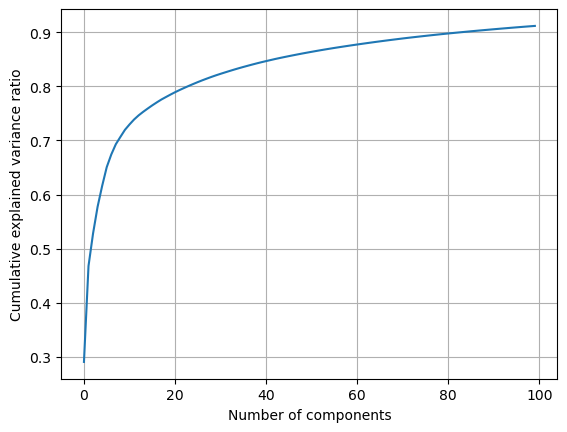

In [94]:
# Calculate the cumulative sum of explained variance ratio
var_ratio_cumsum = np.cumsum(IPCA_2.explained_variance_ratio_)

# Plot the curve of percentage of variance explained vs n_components
plt.plot(var_ratio_cumsum)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.grid()
plt.show()

In [96]:
# find the smallest value of n_component such that 
# (1) average reconstruction error is <= 20%
# (2) percentage of variance explained is >= 80%
# (3) cumulative explained variance ratio >= 80%
# (1), (2) and (3) are essentially the same
# you do not need to re-fit the model using this new value of n_component

# Find the smallest value of n_component such that the cumulative explained variance ratio >= 80%
n_component = np.argmax(var_ratio_cumsum >= 0.8) + 1

n_component


24

In [22]:
# get the mean, eigenvalues, and eigenvectors from the pca model
# assume that:
# the name of mean is mu
# the name of eigenvalues is v (a 1D array)
# the name of eigenvectors is w (a 2D array)


In [97]:
IPCA_3= IncrementalPCA(n_components=24)
IPCA_3.fit_transform(data_new)

mu = IPCA_3.mean_
v = IPCA_3.explained_variance_
w =IPCA_3.components_

In [98]:
v.shape

(24,)

In [99]:
w.shape

(24, 784)

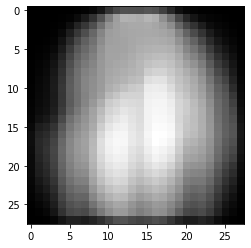

In [25]:
# plot the mean image from pca
# you need to reshape it to 28x28
plt.imshow(mu.reshape(28,28), cmap='gray')

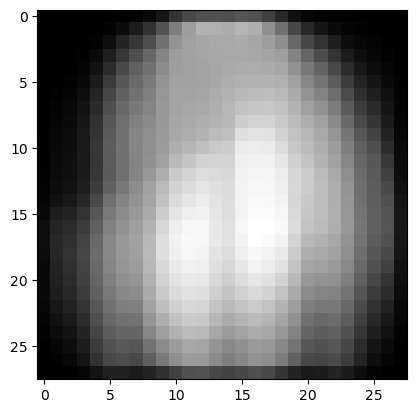

In [100]:
plt.imshow(mu.reshape(28,28), cmap='gray')

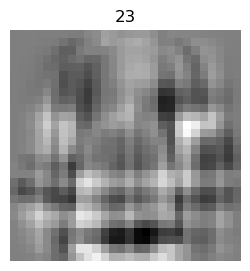

<Figure size 640x480 with 0 Axes>

In [101]:
# use a for loop to show the images of eigenvectors
# image is w[n].reshape(28,28)
# sample code:
# fig, ax = plt.subplots(figsize=(3, 3))
# for n in range(0, 100):
#     ax.imshow(w[n].reshape(28,28), cmap='gray')    
#     ax.axis('off')
#     ax.set_title(n)
#     plt.draw()
#     display.clear_output(wait=True)
#     display.display(fig)
#     plt.pause(0.2) 

fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, 24):
    ax.imshow(w[n].reshape(28,28), cmap='gray')    
    ax.axis('off')
    ax.set_title(n)
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.2)


In [102]:
# L2 norm of an eigenvector w[0]
np.sum(w[0]**2)

0.9999999999999996

In [103]:
# generate a random number
3*np.random.randn()

2.7096147667239325

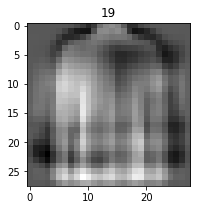

<Figure size 432x288 with 0 Axes>

In [35]:
# generate and show the new images
# use a for loop to geneate 100 new images
#     inside the for loop
#     x_new = mu + y[0]*sqrt(v[0])*w[0]+...+y[K]*sqrt(v[K])*w[K]
#     use a for loop to get X_new using the above equation
#     K is the number of components
#     y[k] is a random number generated using 3*np.random.randn()


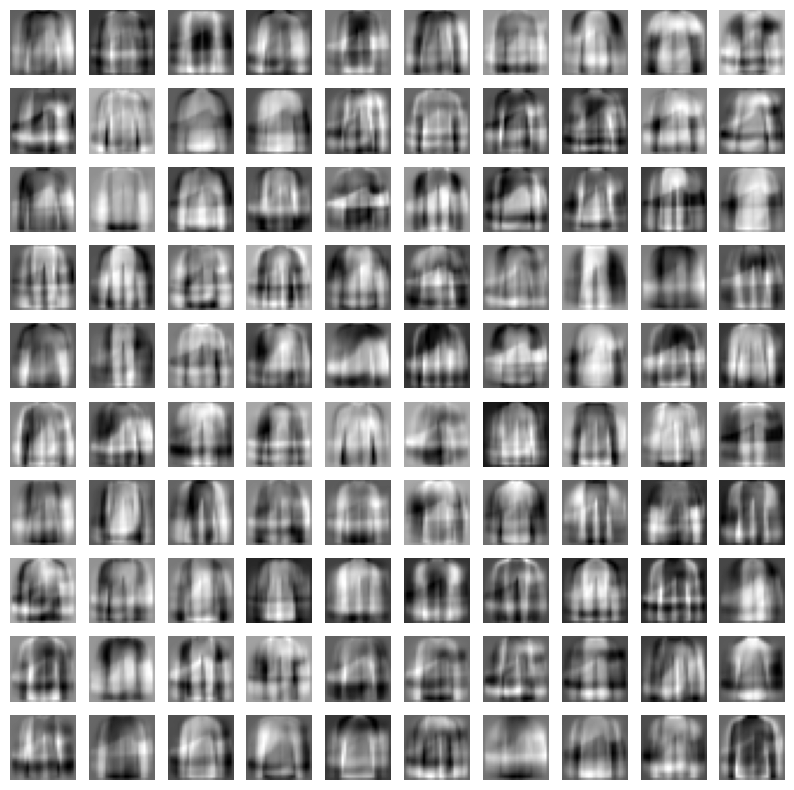

In [104]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        x_new = mu.copy()
        for k in range(24):
            y = 3*np.random.randn()
            x_new += y*np.sqrt(v[k])*w[k]
        ax[i][j].imshow(x_new.reshape(28, 28), cmap='gray')
        ax[i][j].axis('off')
plt.show()

PCA is not good at generating images. <br>
There is a better method based on neural networks.

### t-SNE for visualization

In [60]:
#select a subset of data points for TSNE
#because TSNE is very time-consuming
data_s=data[0::100]
target_s=target[0::100]
images_s=images[0::100]

c:\Users\Mestr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Mestr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


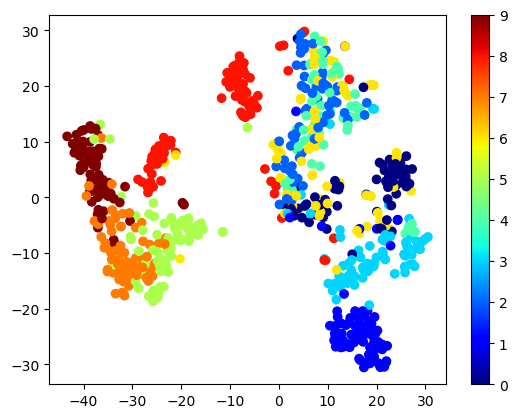

In [61]:
# run t-SNE on data_s and visualize the data in 2D using scatter plot
from sklearn.manifold import TSNE

tsne = TSNE()
data_s_tsne = tsne.fit_transform(data_s)

# Create a scatter plot of the t-SNE transformed data
plt.scatter(data_s_tsne[:, 0], data_s_tsne[:, 1], c=target_s, cmap='jet')
plt.colorbar()
plt.show()